In [ ]:
#https://www.tensorflow.org/tutorials/images/transfer_learning
#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W3/ungraded_lab/C2_W3_Lab_1_transfer_learning.ipynb

In [ ]:
import os 

from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-01-18 17:01:56--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   250MB/s    in 0.3s    

2022-01-18 17:01:56 (250 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(150,150,3),
    include_top= False, 
    weights = None)

pre_trained_model.load_weights(local_weights_file)

In [ ]:
#pre_trained_model.summary()

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
last_layer = pre_trained_model.get_layer("mixed7")
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = Model(pre_trained_model.input, x)

model.compile(
    loss = "binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics = ["accuracy"]
)

last layer output shape:  (None, 7, 7, 768)


In [ ]:

#https://www.kaggle.com/c/dogs-vs-cats/data
#!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:

!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
import zipfile 

unzip = zipfile.ZipFile("./cats_and_dogs_filtered.zip", "r")
unzip.extractall("tmp/")
unzip.close()

base_dir = "tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")



Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 218MB/s]


'\n!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9\n\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\nimport os\nimport zipfile\n\nzip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", \'r\')\nzip_ref.extractall("tmp/")\nzip_ref.close()\n\n# Define our example directories and files\nbase_dir = \'tmp/cats_and_dogs_filtered\'\n\ntrain_dir = os.path.join( base_dir, \'train\')\nvalidation_dir = os.path.join( base_dir, \'validation\')\n\n\ntrain_cats_dir = os.path.join(train_dir, \'cats\') # Directory with our training cat pictures\ntrain_dogs_dir = os.path.join(train_dir, \'dogs\') # Directory with our training dog pictures\nvalidation_cats_dir = os.path.join(validation_dir, \'cats\') # Directory with our validation cat pictures\nvalidation_dogs_dir = os.path.join(validation_dir, \'dogs\')# Directory with our validation dog pictures\n\ntrain_cat_fnames = os.listdir(train_cats_dir)\ntrain_dog_fnames = os.listdir(train_dogs_dir)\n\n# Add our data-augmentation paramet

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range=0.2,
    horizontal_flip = True) 
    

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 100, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=50,
    verbose = 2  

)

Epoch 1/20
100/100 - 25s - loss: 0.2793 - accuracy: 0.8730 - val_loss: 0.2205 - val_accuracy: 0.9170 - 25s/epoch - 245ms/step
Epoch 2/20
100/100 - 23s - loss: 0.2085 - accuracy: 0.9215 - val_loss: 0.1007 - val_accuracy: 0.9620 - 23s/epoch - 228ms/step
Epoch 3/20
100/100 - 21s - loss: 0.2116 - accuracy: 0.9220 - val_loss: 0.1800 - val_accuracy: 0.9420 - 21s/epoch - 215ms/step
Epoch 4/20
100/100 - 22s - loss: 0.2068 - accuracy: 0.9240 - val_loss: 0.1065 - val_accuracy: 0.9610 - 22s/epoch - 224ms/step
Epoch 5/20
100/100 - 22s - loss: 0.1830 - accuracy: 0.9315 - val_loss: 0.1180 - val_accuracy: 0.9590 - 22s/epoch - 220ms/step
Epoch 6/20
100/100 - 22s - loss: 0.1553 - accuracy: 0.9425 - val_loss: 0.1643 - val_accuracy: 0.9520 - 22s/epoch - 221ms/step
Epoch 7/20
100/100 - 22s - loss: 0.1852 - accuracy: 0.9395 - val_loss: 0.1033 - val_accuracy: 0.9630 - 22s/epoch - 224ms/step
Epoch 8/20
100/100 - 22s - loss: 0.1483 - accuracy: 0.9495 - val_loss: 0.0968 - val_accuracy: 0.9650 - 22s/epoch - 221

<Figure size 432x288 with 0 Axes>

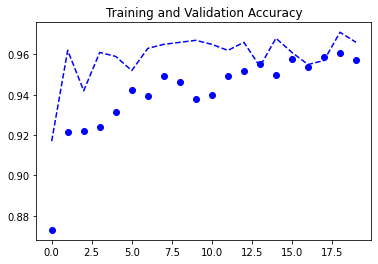

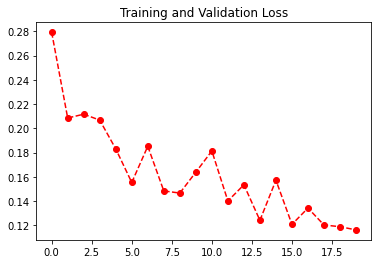

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "--b", label="validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.figure()

plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, loss, "--r", label="Validation loss")
plt.title("Training and Validation Loss")
plt.figure()